In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utide import solve

In [3]:
from analysis_routines import *
from plotting_routines_xr import *
from processing_routines import datenum_to_epoch
from wavelet_analysis import wavelet_power_spectrum
from harmonic_analysis import *
plt.style.use('/home/manu/TFG_repo/notebooks/mplstyles/notebook.mplstyle')

In [4]:
df = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G005 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)

In [5]:
D1_filtered = lowpass_filter(df.D1, data.date, 1/5, 1/64)
G005_filtered = lowpass_filter(G005.x, data.date, 1/5, 1/64)

#### Wavelets para identificar regiones con variaciones de alta frecuencia

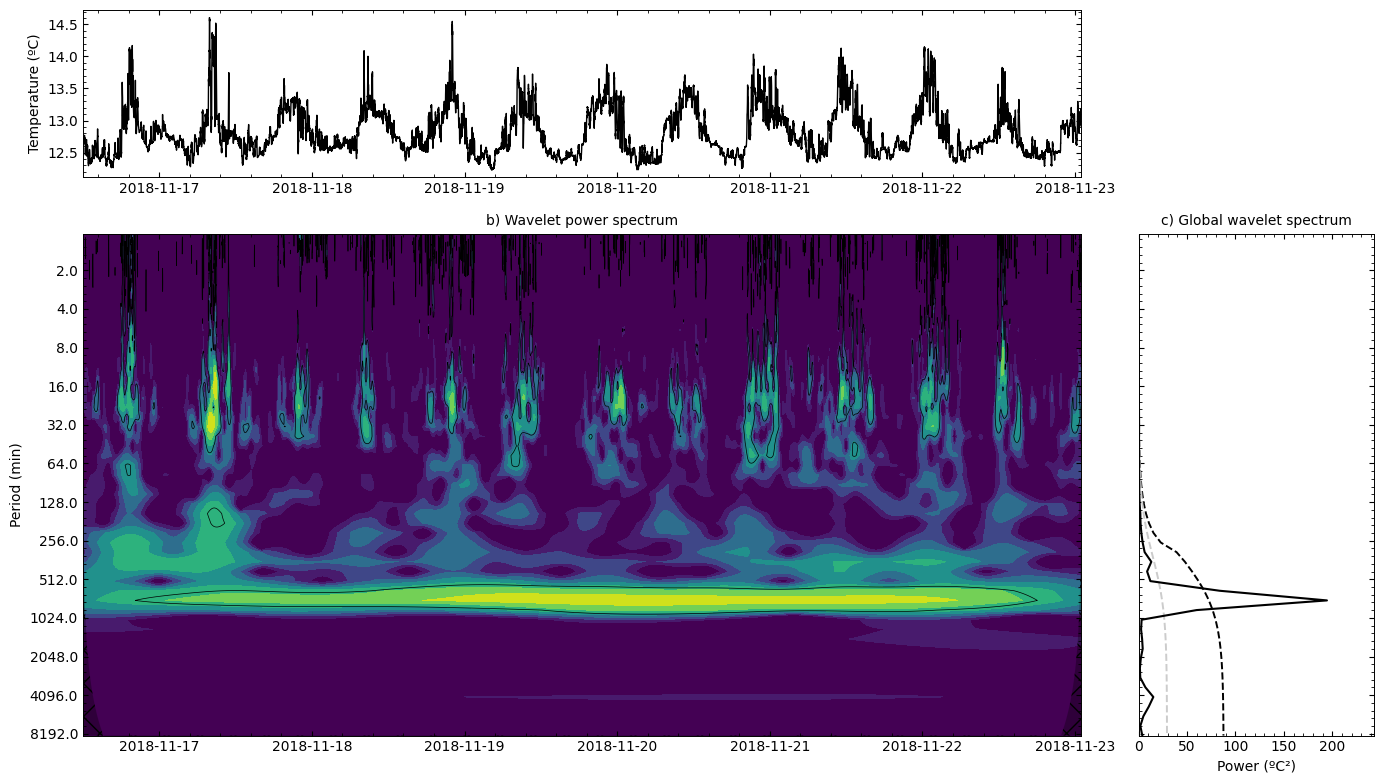

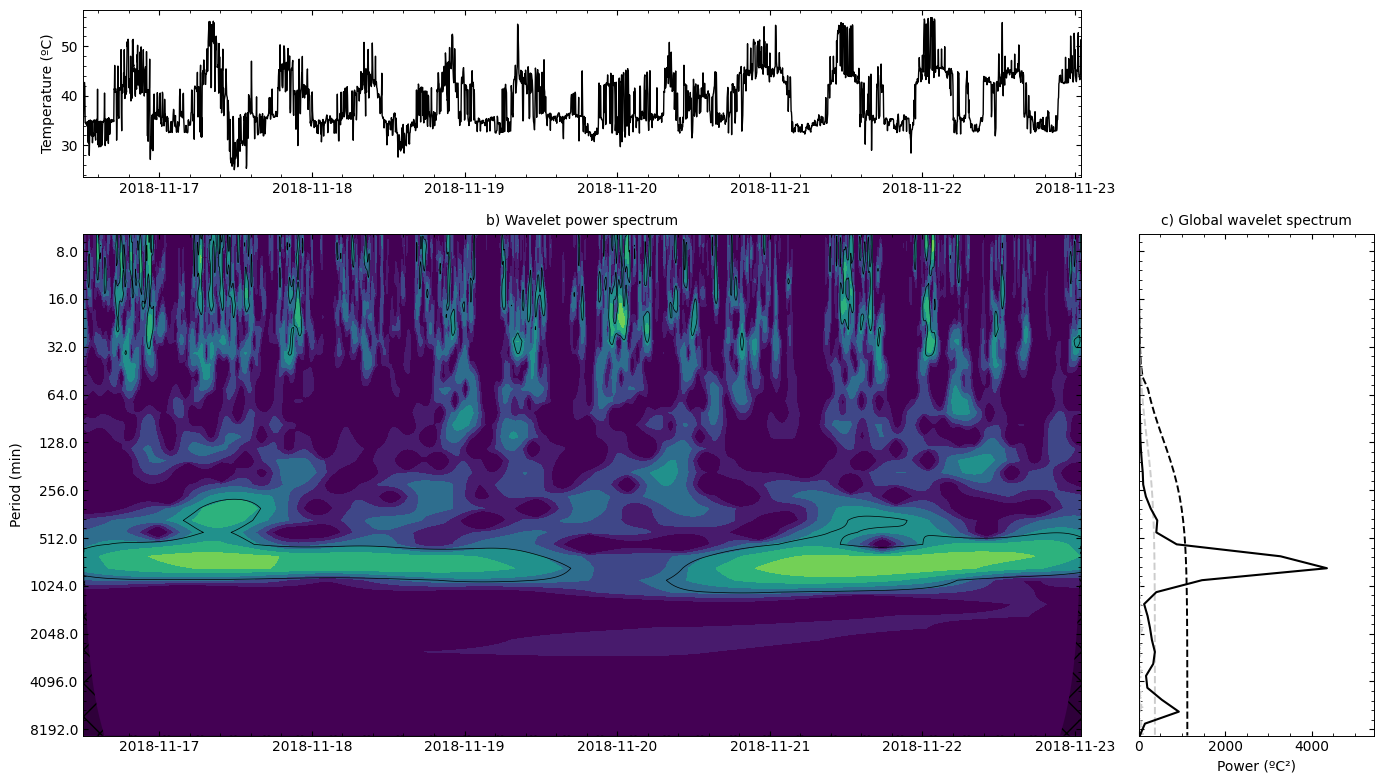

In [6]:
date_0 = datetime(2018, 11, 23)
wavelet_power_spectrum(data.temp[:, 8], data.date, period=[None,datetime(2018, 11, 23),6])
wavelet_power_spectrum(df.D1, data.date, period=[None,datetime(2018, 11, 23),36], norm_levels=2**9)

## Tren de solitones: ~ 23h 22 nov 

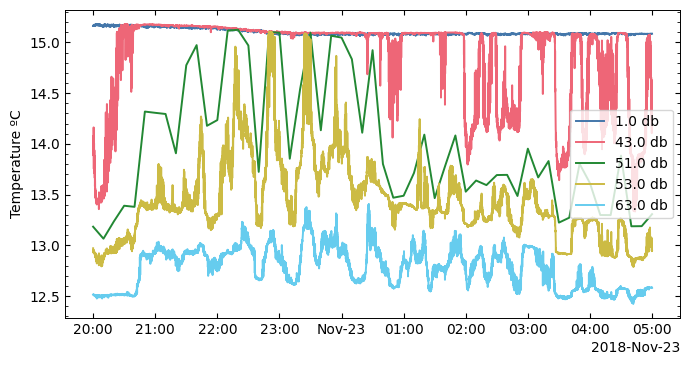

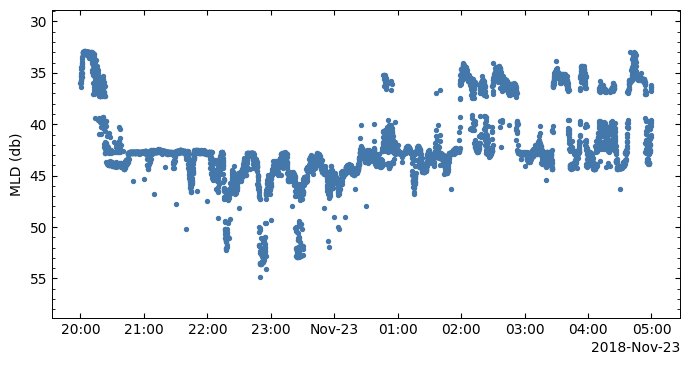

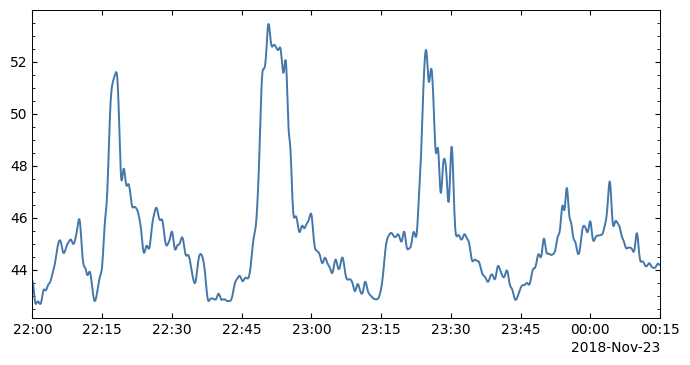

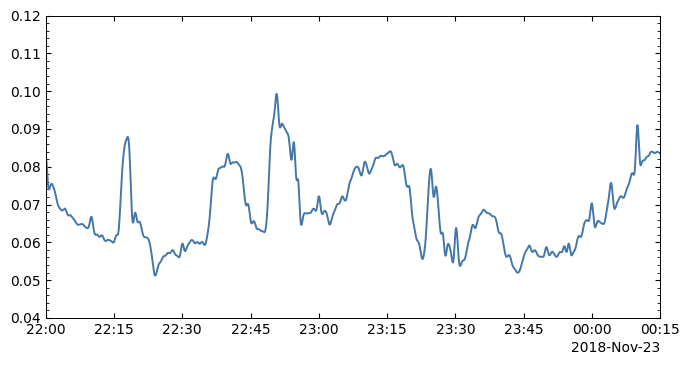

In [6]:
date_0 = datetime(2018, 11, 22, 20)
date_05 = datetime(2018, 11, 23, 5)

date_0_precise = datetime(2018, 11, 22, 22)
date_05_precise = datetime(2018, 11, 23, 0, 15)
plot_thermistor_temperature(data, [0,5,6,7,8], period=[date_0, date_05])
plot_fit_variable(df, 'D1', period=[date_0, date_05])
plot_arbitrary_variable(D1_filtered, period=[date_0_precise, date_05_precise], type='plot')
plot_arbitrary_variable(G005_filtered, period=[date_0_precise, date_05_precise], ylim=(0.04, 0.12), type='plot')

In [18]:
interact_profile(data, df, range_dates=[date_0_precise, date_05_precise], dn=1)


interactive(children=(IntSlider(value=0, description='Number:', layout=Layout(width='100%'), max=1620), Output…

## Tren de solitones: ~ 23h 19 nov

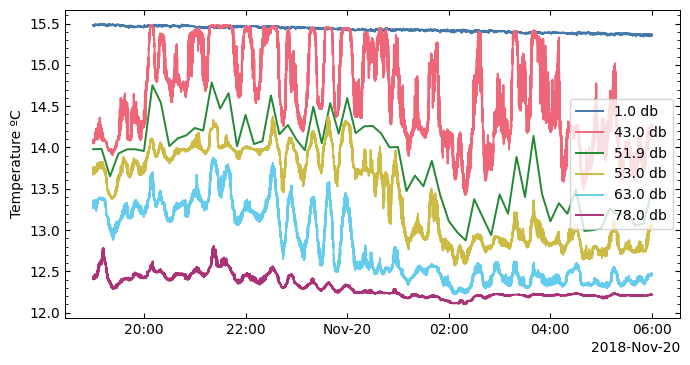

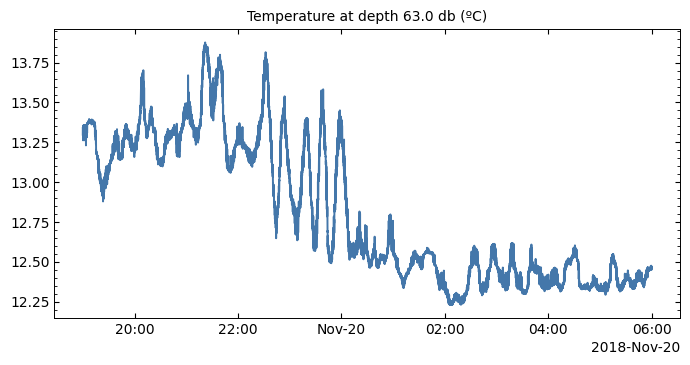

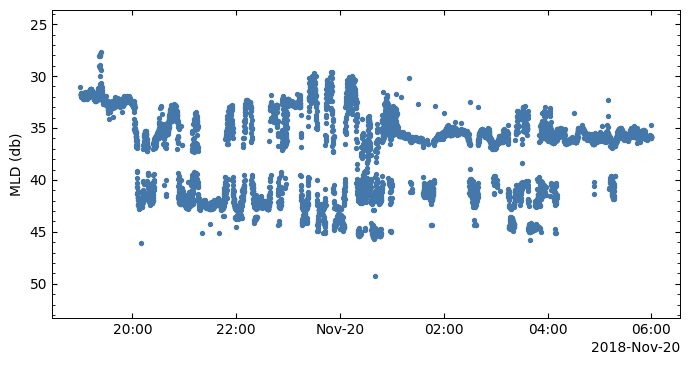

In [11]:
date_1 = datetime(2018, 11, 19, 19)
date_2 = datetime(2018, 11, 20, 6)
plot_thermistor_temperature(data, [0,5,6,7,8,9], period=[date_1, date_2])
plot_thermistor_temperature(data, 8, period=[date_1, date_2])
plot_fit_variable(df, 'D1', period=[date_1, date_2])

In [26]:
date_1_precise = datetime(2018, 11, 19, 20)
date_2_precise = datetime(2018, 11, 20, 0, 15)

In [65]:
from multitaper import MTSpec
nw = 3.5
kspec = 4
dt = 5/60
soliton_1_psd = MTSpec(df.D1[datetime(2018, 11, 19, 20, 15):datetime(2018, 11, 20, 3, 15)].to_numpy(), nw=nw, kspec=kspec, dt=dt )
freq_1, psd_1 = soliton_1_psd.rspec()

In [66]:
b = np.argmax(psd_1)
c = 1/freq_1[b]

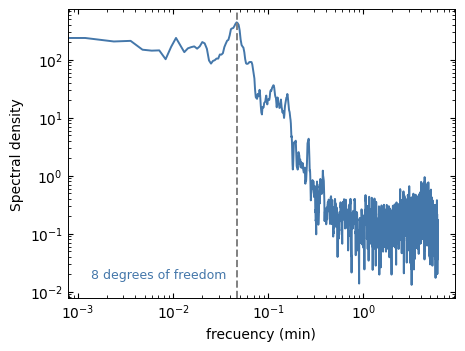

In [67]:
plot_spectrum(freq_1, psd_1, soliton_1_psd.se[0], 'min', x='freqs', vlines=[freq_1[b]])

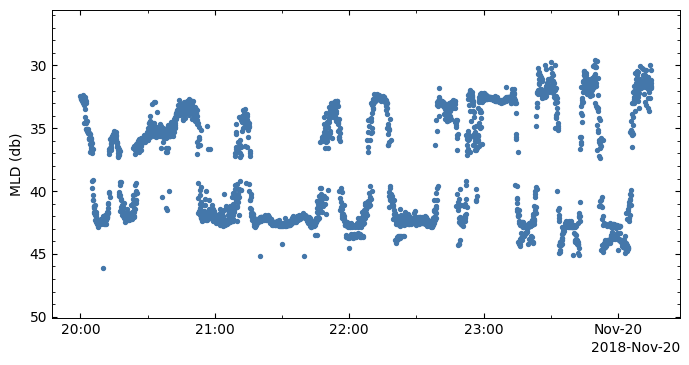

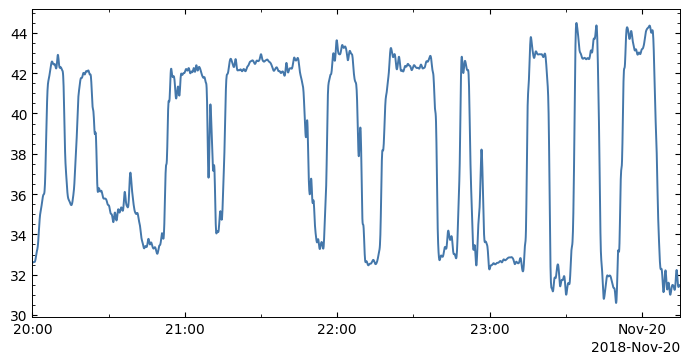

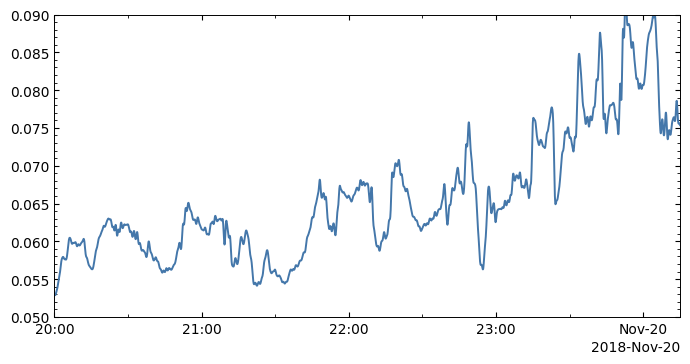

In [29]:
plot_fit_variable(df, 'D1', period=[date_1_precise, date_2_precise])
plot_arbitrary_variable(D1_filtered, period=[date_1_precise, date_2_precise], type='plot')
plot_arbitrary_variable(G005_filtered, period=[date_1_precise, date_2_precise], ylim=(0.05, 0.09), type='plot')

In [25]:
interact_profile(data, df, range_dates=[date_1_precise, date_2_precise], dn=1)

interactive(children=(IntSlider(value=0, description='Number:', layout=Layout(width='100%'), max=5040), Output…

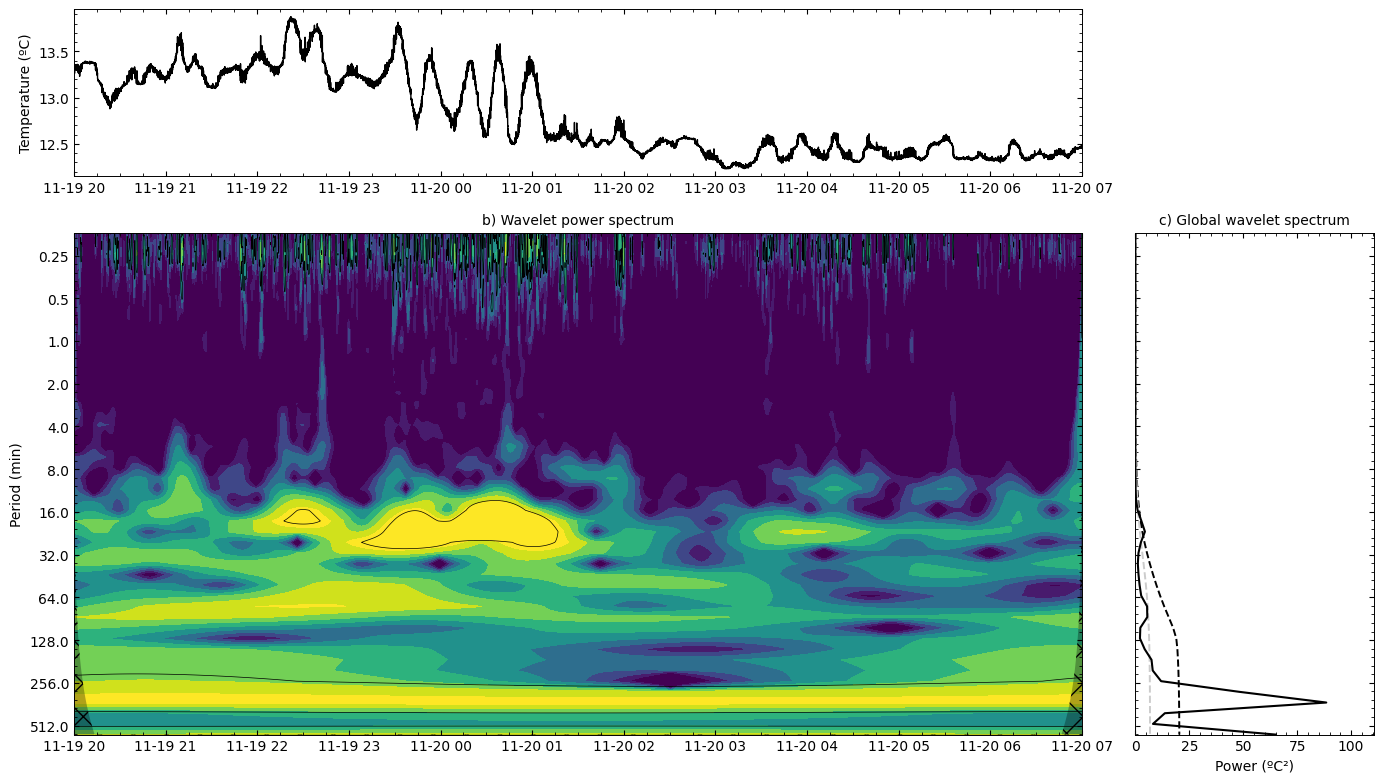

In [50]:
wavelet_power_spectrum(data.temp[:, 8], data.date, period=[date_1, date_2])

In [55]:
slice_ = slice(datetime(2018, 11, 19, 20, 15), datetime(2018, 11, 20, 3, 15))
freqs, amplitude, power, psd, dof= spectrum(data.temp[:, 8].loc[slice_].data, 5, 3)

In [56]:
b = period_to_freq(23, 'm')

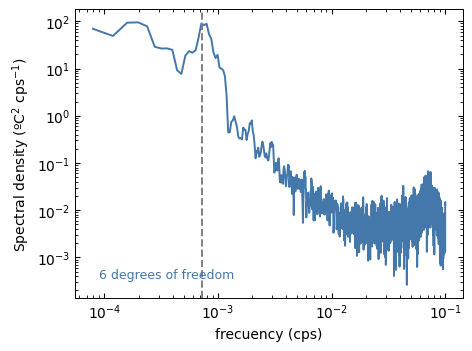

In [57]:
plot_spectrum(freqs, psd, dof, 'cps', 'ºC', vlines=[b])

In [43]:
display_video('internal_wave_2_precise.mp4')

## Tren de solitones: 8h 18 nov

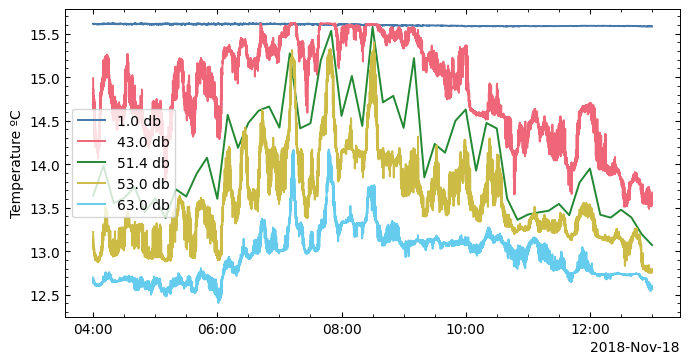

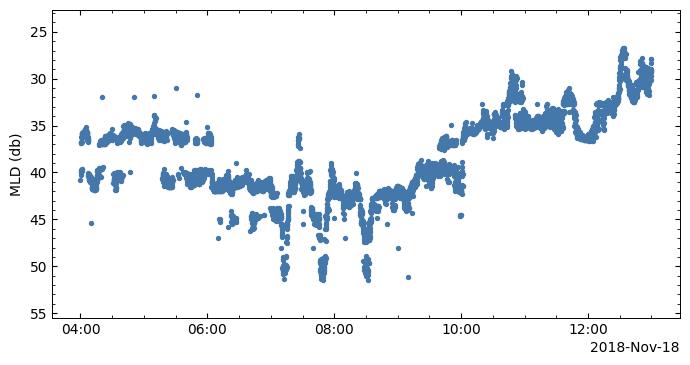

In [17]:
date_5 = datetime(2018, 11, 18, 4)
date_6 = datetime(2018, 11, 18, 13)
plot_thermistor_temperature(data, [0,5,6,7,8], period=[date_5, date_6])
plot_fit_variable(df, 'D1', period=[date_5, date_6])


## Tren de solitones: ~ 11h 21 nov

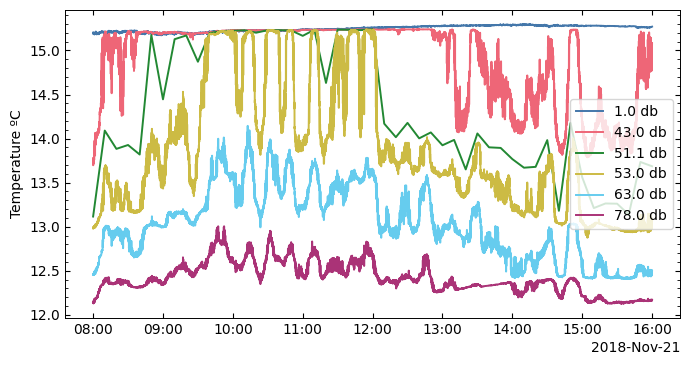

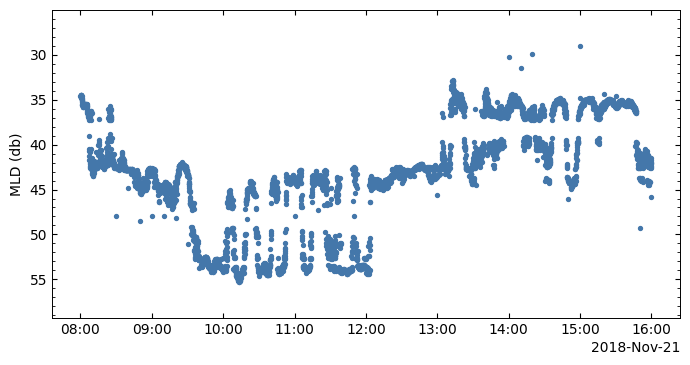

In [7]:
date_7 = datetime(2018, 11, 21, 8)
date_8 = datetime(2018, 11, 21, 16)
date_7_precise = datetime(2018, 11, 21, 10)
date_8_precise = datetime(2018, 11, 21, 12, 15)
plot_thermistor_temperature(data, [0, 5,6,7, 8, 9], period=[date_7, date_8])
plot_fit_variable(df, 'D1', period=[date_7, date_8])

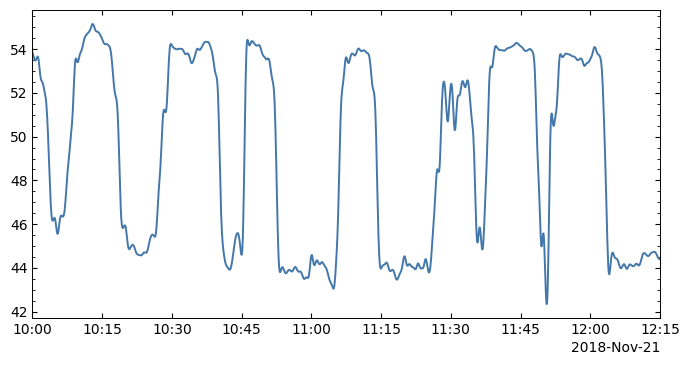

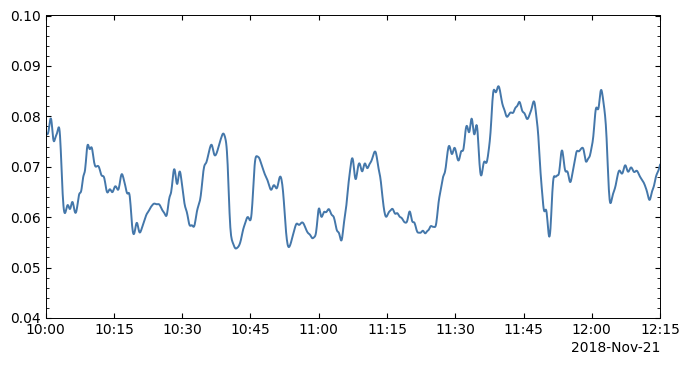

In [8]:
plot_arbitrary_variable(D1_filtered, period=[date_7_precise, date_8_precise], type='plot')
plot_arbitrary_variable(G005_filtered, period=[date_7_precise, date_8_precise], ylim=(0.04, 0.10), type='plot')

                            x
date                         
2018-11-16 11:00:00  0.076360
2018-11-16 11:00:05  0.079706
2018-11-16 11:00:10  0.080285
2018-11-16 11:00:15  0.078741
2018-11-16 11:00:20  0.080819
...                       ...
2019-04-08 10:59:40  0.006101
2019-04-08 10:59:45  0.006088
2019-04-08 10:59:50  0.005855
2019-04-08 10:59:55  0.005830
2019-04-08 11:00:00  0.005586

[2471041 rows x 1 columns]


<IPython.core.display.Javascript object>


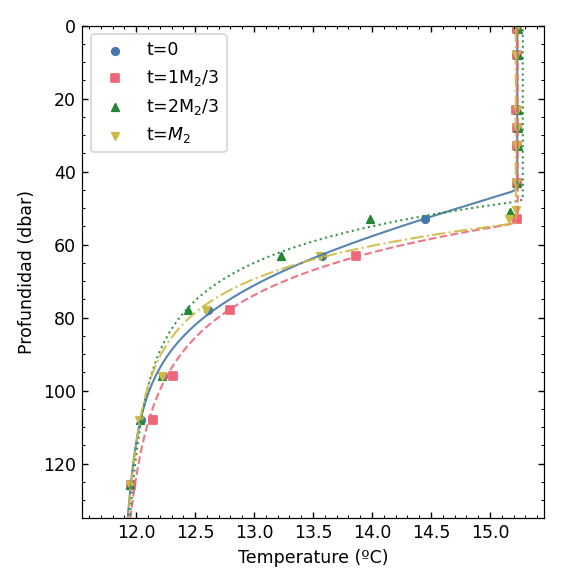

In [13]:
i_dates = [datetime(2018, 11, 21, 10, 45), datetime(2018, 11, 21, 10, 49), datetime(2018, 11, 21, 11), 
          datetime(2018, 11, 21, 10)]

print(G005)
plot_multiple_profiles_ax(df, data, i_dates)

In [9]:
display_video('internal_wave_3.mp4')

## Tren de solitones: ~ 00h 22 nov

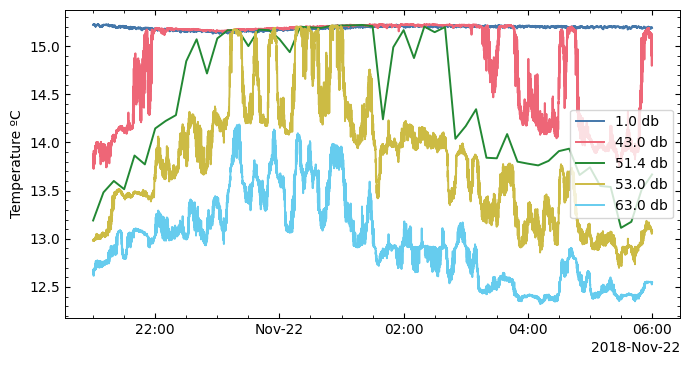

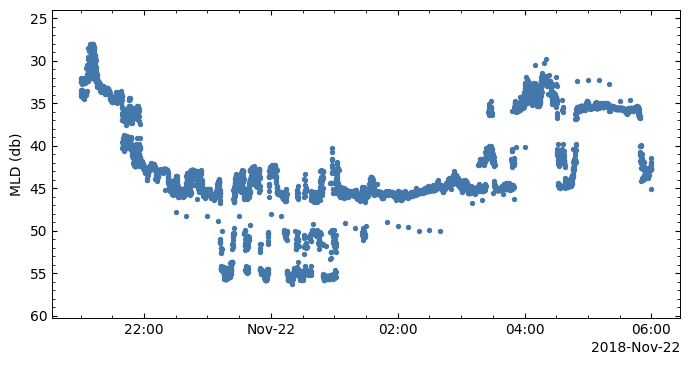

In [19]:
date_9 = datetime(2018, 11, 21, 21)
date_10 = datetime(2018, 11, 22, 6)

plot_thermistor_temperature(data, [0,5,6,7,8], period=[date_9, date_10])
plot_fit_variable(df, 'D1', period=[date_9, date_10])

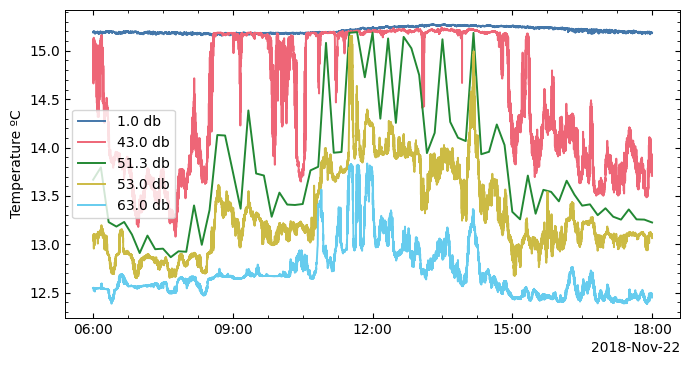

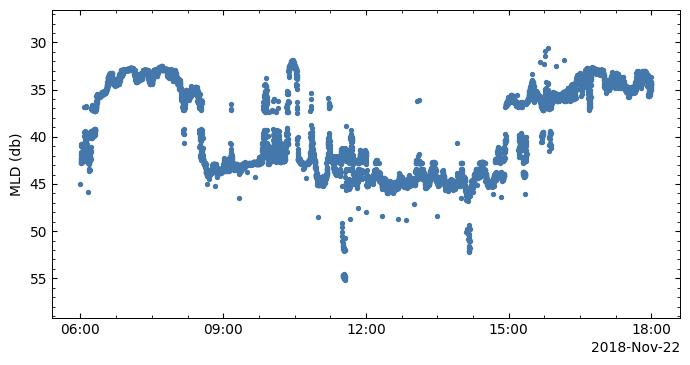

In [20]:
date_11 = datetime(2018, 11, 22, 6)
date_12 = datetime(2018, 11, 22, 18)
plot_thermistor_temperature(data, [0,5,6,7,8], period=[date_11, date_12])
plot_fit_variable(df, 'D1', period=[date_11, date_12])

## Tren de solitones: ~21h 18 nov

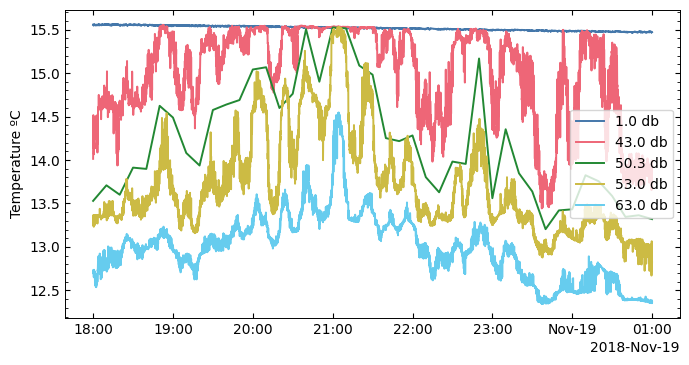

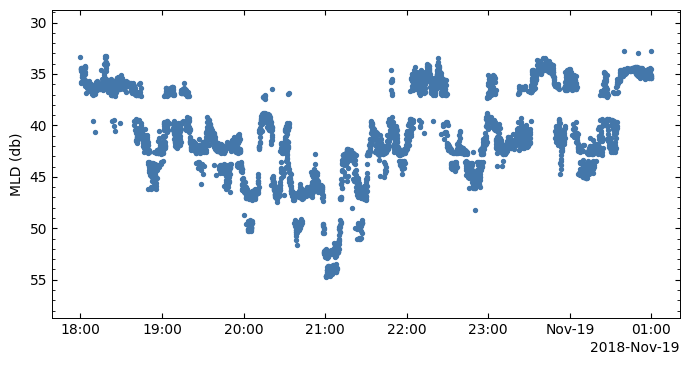

In [56]:
date_13 = datetime(2018, 11, 18, 18)
date_14 = datetime(2018, 11, 19, 1)
date_13_precise = datetime(2018, 11, 18, 20)
date_14_precise = datetime(2018, 11, 18, 22)
plot_thermistor_temperature(data, [0,5,6,7,8], period=[date_13, date_14])
plot_fit_variable(df, 'D1', period=[date_13, date_14])

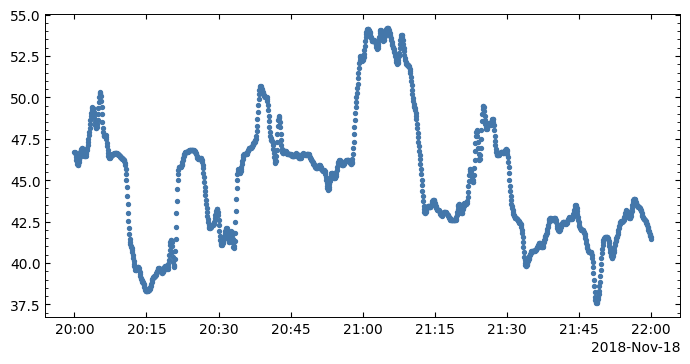

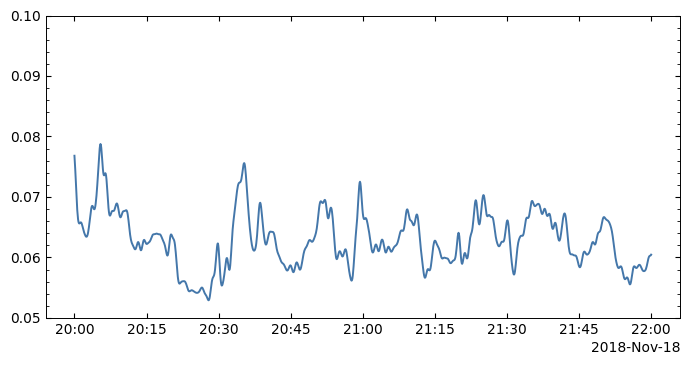

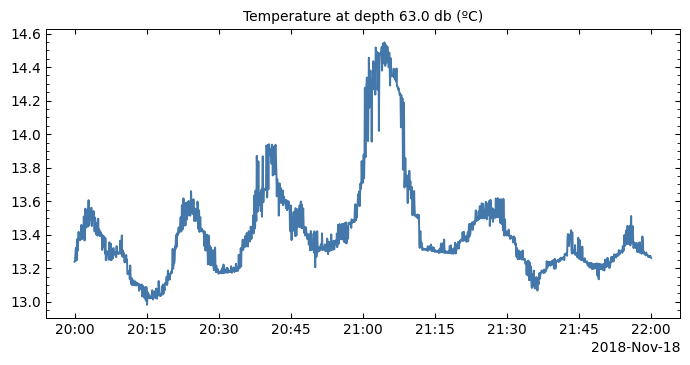

In [60]:
plot_arbitrary_variable(D1_filtered, period=[date_13_precise, date_14_precise])
plot_arbitrary_variable(G005_filtered, period=[date_13_precise, date_14_precise], ylim=(0.05, 0.10), type='plot')
plot_thermistor_temperature(data, 8, period=[date_13_precise, date_14_precise])


## Tren de solitones: ~06h 6 dec
Apenas afecta a la capa de mezcla

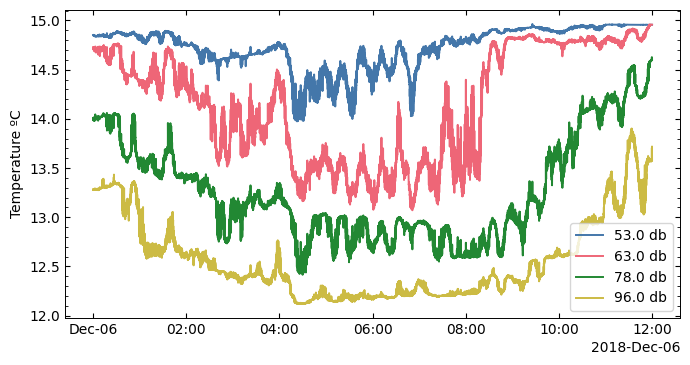

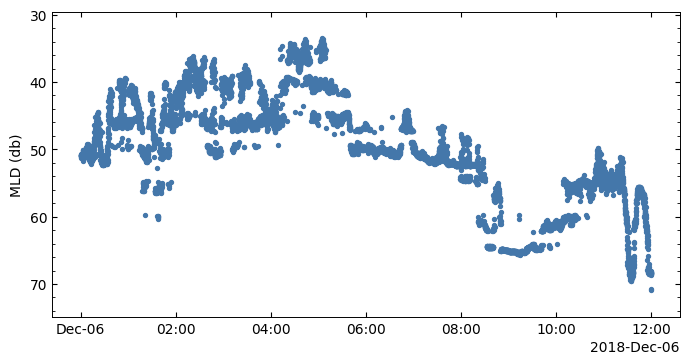

In [54]:
date_15 = datetime(2018, 12, 6, 0)
date_16 = datetime(2018, 12, 6, 12)
date_15_precise = datetime(2018, 12, 6, 4)
date_16_precise = datetime(2018, 12, 6, 7, 30)
plot_thermistor_temperature(data, [7,8,9,10], period=[date_15, date_16])
plot_fit_variable(df, 'D1', period=[date_15, date_16])

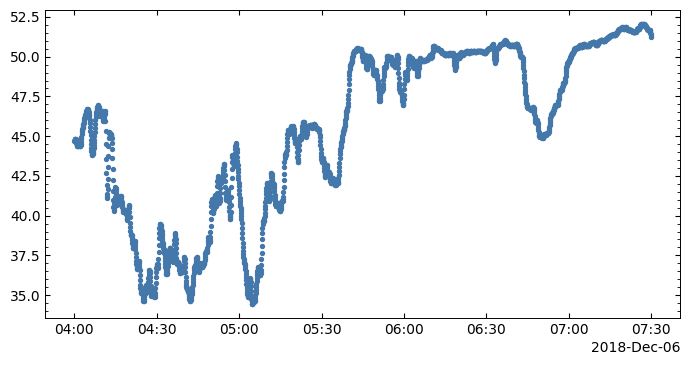

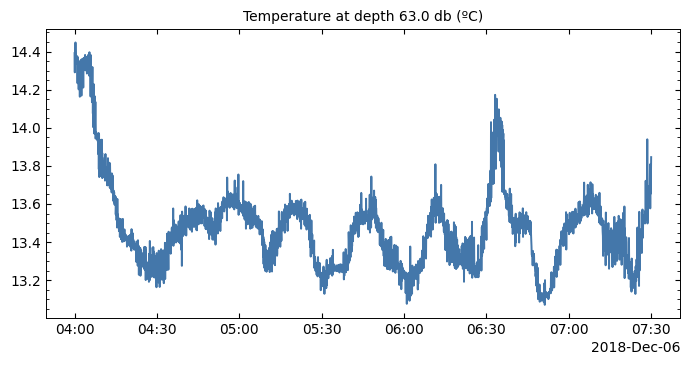

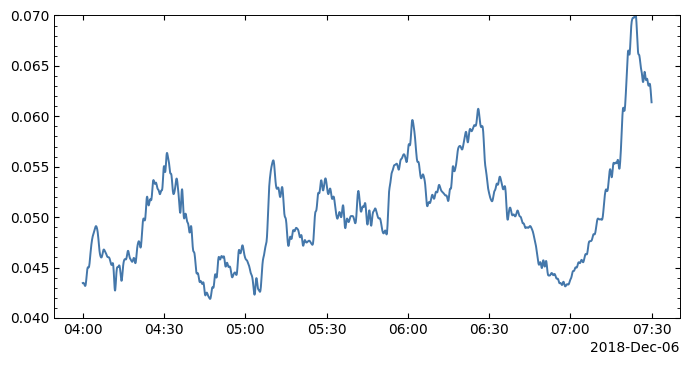

In [55]:
plot_arbitrary_variable(D1_filtered, period=[date_15_precise, date_16_precise])
plot_thermistor_temperature(data, 8, period=[date_15_precise, date_16_precise])
plot_arbitrary_variable(G005_filtered, period=[date_15_precise, date_16_precise], ylim=(0.04, 0.07), type='plot')

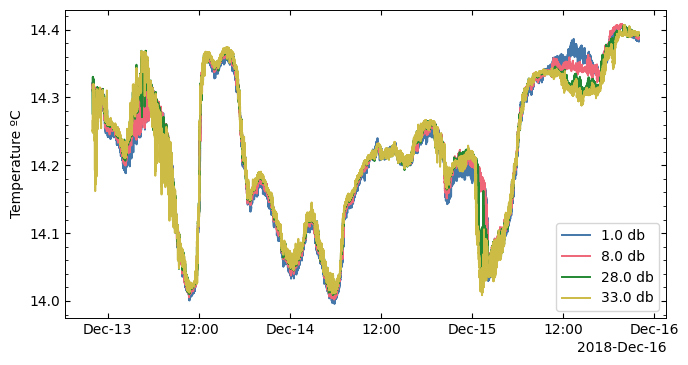

In [14]:
date_1 = datetime(2018, 12, 12, 22)
date_2 = datetime(2018, 12, 15, 22)
plot_thermistor_temperature(data, [0, 1, 3, 4], period=[date_1, date_2])